In [ ]:
! pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [ ]:
from mtcnn.mtcnn import MTCNN
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import urllib
import pickle



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f=open("/content/drive/MyDrive/personal/Mini project/Face Recognition/faceScrub/facescrub_actors.txt",'r')

## This scipt will train single shot face identifier.

In [ ]:
#import dataset

#male Dataset

Image=[]
instructionsForTheFile=f.readline()
#name	image_id	face_id	url	bbox	sha256
fid=0
prevClebinfo=["Aaron","Eckhart"]
while True:
  try:
    fileName=f.readline()
    #print(fileName)
  except:
    break 
  if(fileName==""):
    break
  fileName=fileName[:-1]
  CelebInfo=fileName.split()
  try:  
    CelebInfo[4]
    CelebInfo[5]
    
  except:
    continue
  if(prevClebinfo[0]!=CelebInfo[0] or prevClebinfo[1]!=CelebInfo[1]):
    fid+=1
    prevClebinfo[0]=CelebInfo[0]
    prevClebinfo[1]=CelebInfo[1]
  Image.append([[CelebInfo[4],CelebInfo[5]],fid])

f.close()




 

In [ ]:
f=open("/content/drive/MyDrive/personal/Mini project/Face Recognition/faceScrub/facescrub_actresses.txt",'r')
#import dataset

#female Dataset


instructionsForTheFile=f.readline()
#name	image_id	face_id	url	bbox	sha256

prevClebinfo=["Lexi ","Ainsworth"]
while True:
  try:
    fileName=f.readline()
    #print(fileName)
  except:
    break 
  if(fileName==""):
    break
  fileName=fileName[:-1]
  CelebInfo=fileName.split()
  if(prevClebinfo[0]!=CelebInfo[0] or prevClebinfo[1]!=CelebInfo[1]):
    fid+=1
    prevClebinfo[0]=CelebInfo[0]
    prevClebinfo[1]=CelebInfo[1]
    
  Image.append([[CelebInfo[4],CelebInfo[5]],fid])
  #print([CelebInfo[4],fid])

f.close()

# Model Creation


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Conv2DTranspose,Flatten,Dense
from tensorflow.keras.applications import VGG16 as vgg

In [ ]:
model=Sequential()
model.add(vgg(include_top=False, weights="imagenet", input_tensor=None, input_shape=(240,240,3), pooling=None, classes=1000, classifier_activation="softmax"))
model.add(Conv2D(filters=512,kernel_size=(7,7), activation="relu"))
model.add(Flatten())
model.add(Dense(732,activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 512)         12845568  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 732)               375516    
Total params: 27,935,772
Trainable params: 27,935,772
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
   optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Shuffeling

In [ ]:
from sklearn.model_selection import train_test_split
X=[]
y=[]
for i in Image:
  y.append(i[1])
  X.append(i[0])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
del(X)
del(y)

# Training(partial)

Mtcnn error


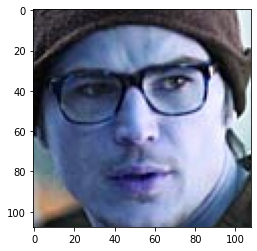

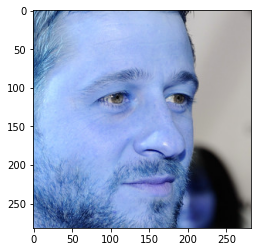

Mtcnn error


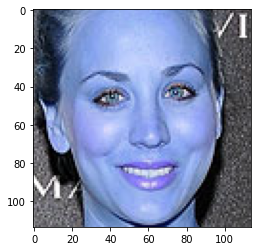

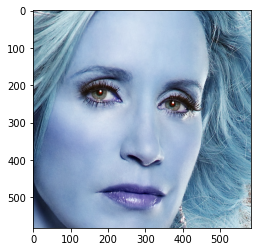

Mtcnn error


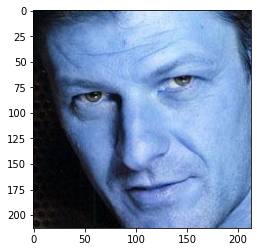

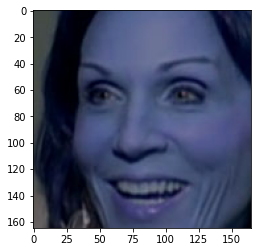

Mtcnn error
Mtcnn error


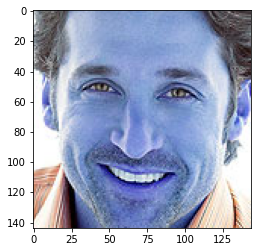

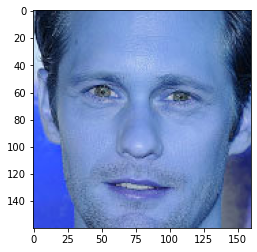

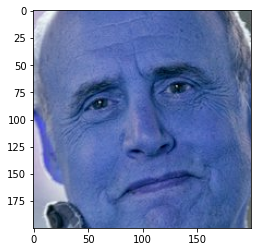

skip
Mtcnn error


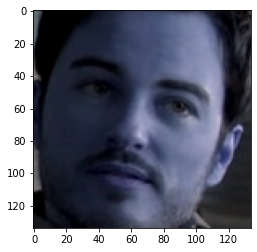

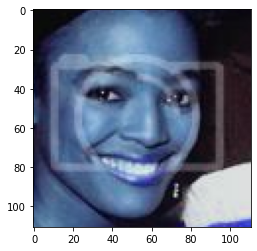

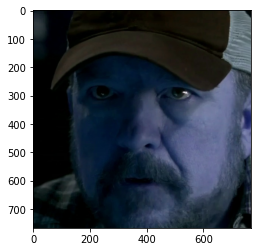

skip


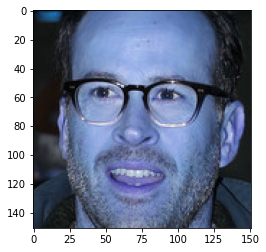

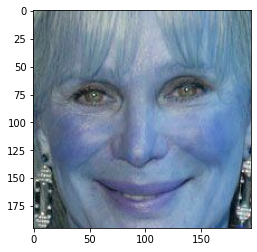

Mtcnn error
Mtcnn error


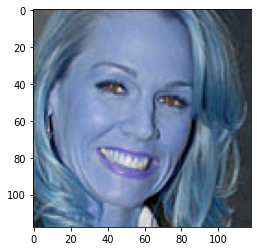

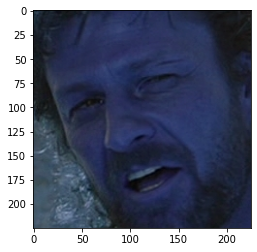

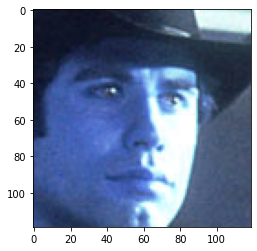

Mtcnn error
Mtcnn error


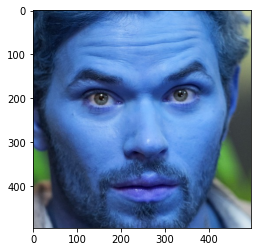

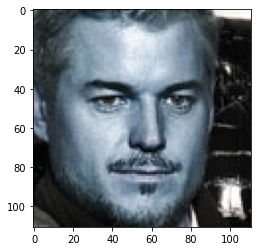

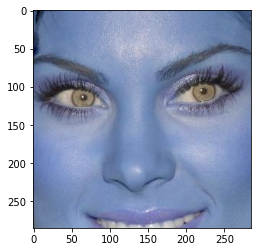

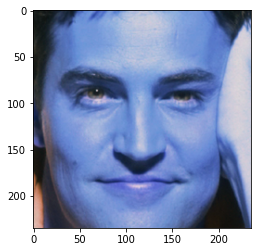

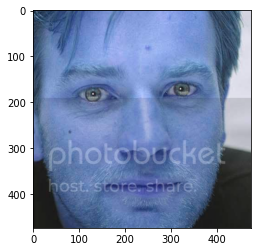

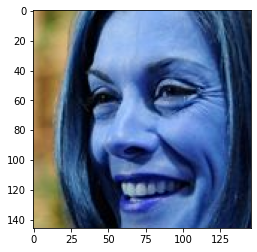

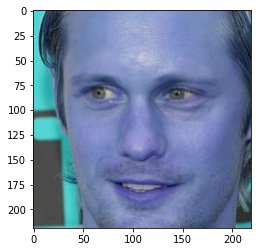

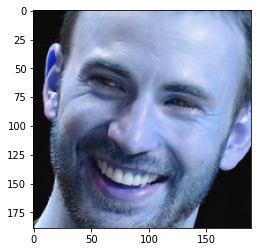

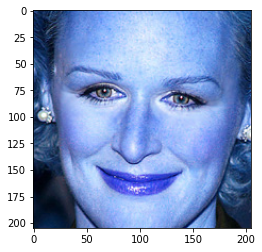

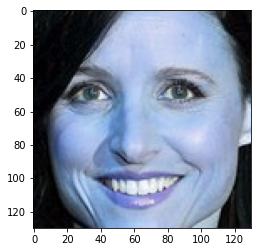

Mtcnn error


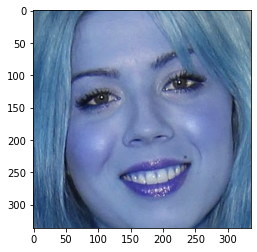

Mtcnn error
Mtcnn error


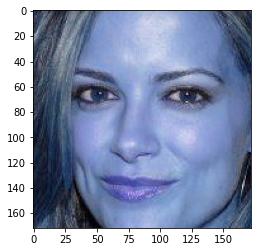

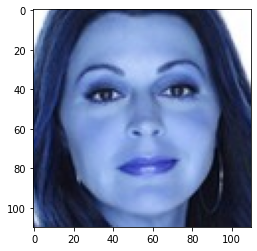

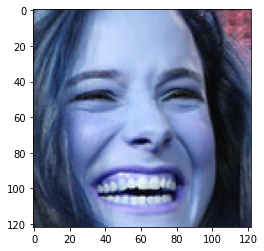

Mtcnn error


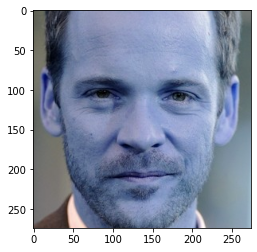

Mtcnn error


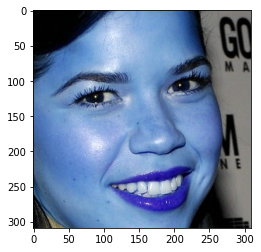

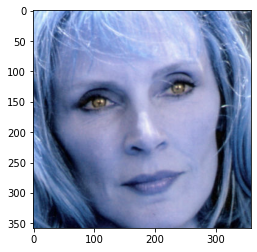

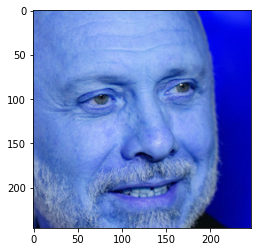

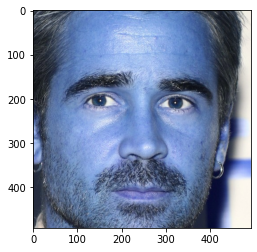

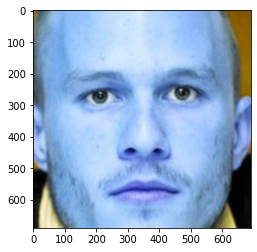

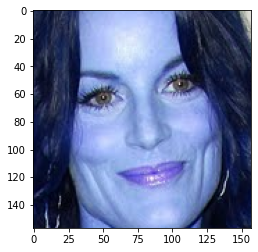

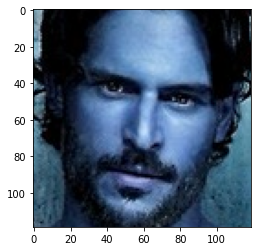

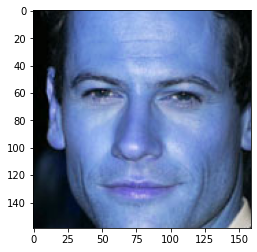

Mtcnn error


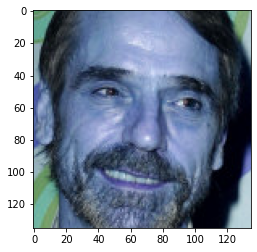

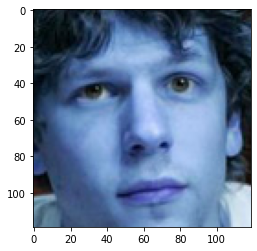

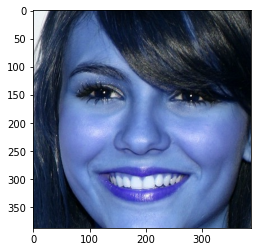

Mtcnn error


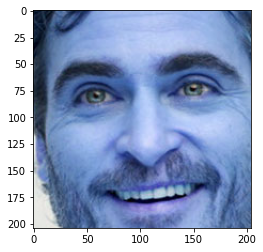

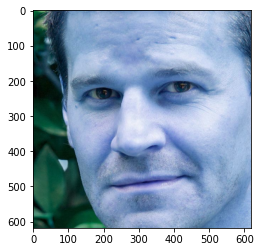

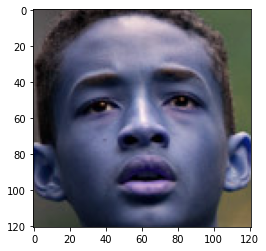

Mtcnn error


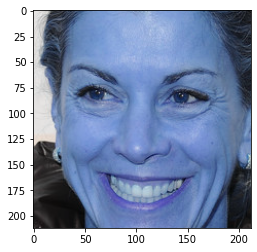

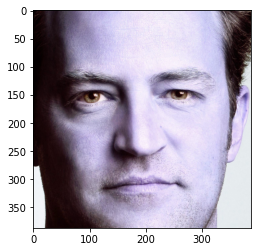

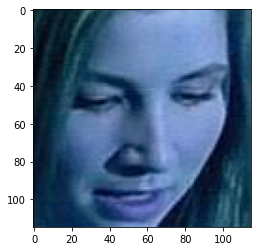

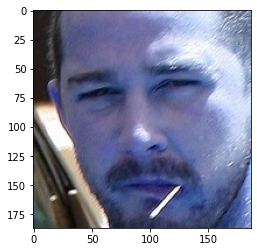

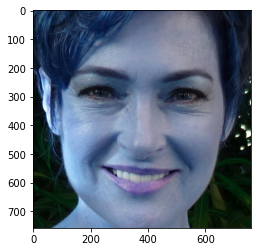

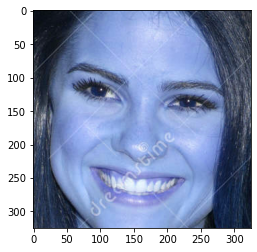

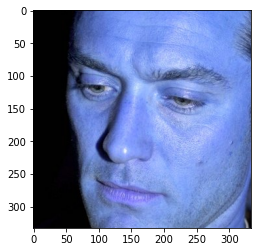

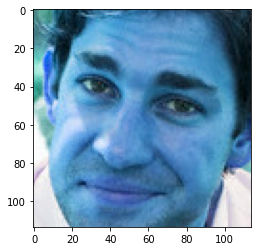

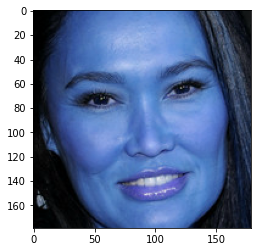

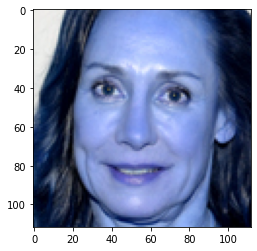

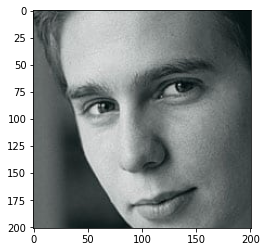

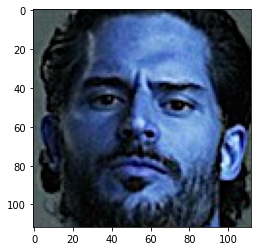

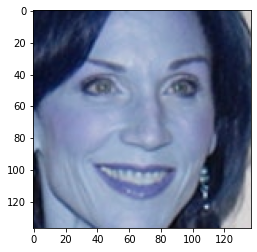

Mtcnn error


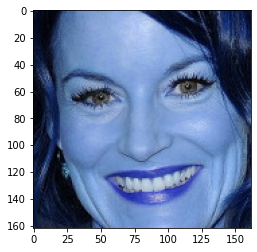

Mtcnn error


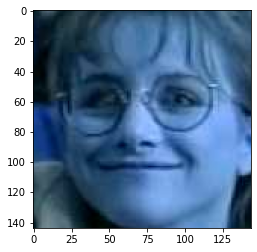

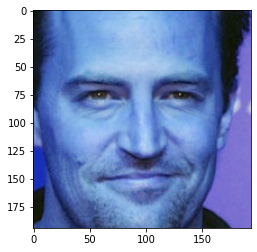

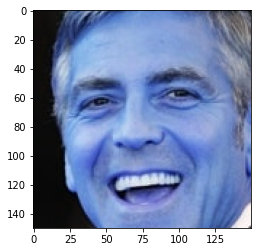

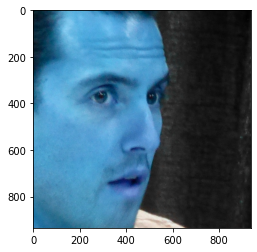

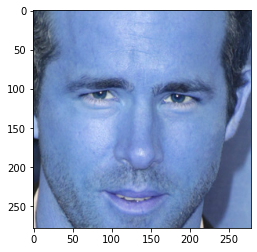

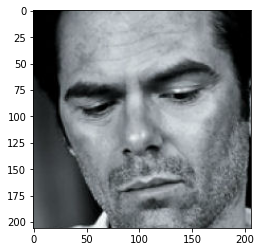

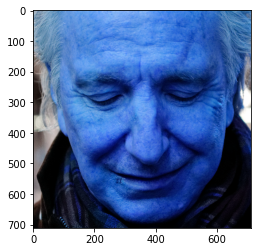

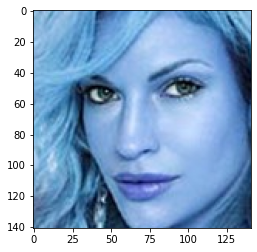

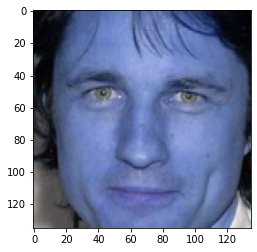

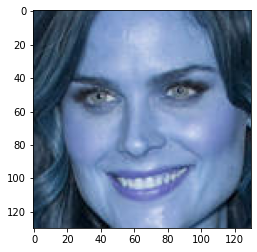

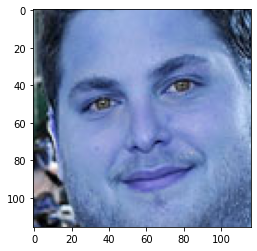

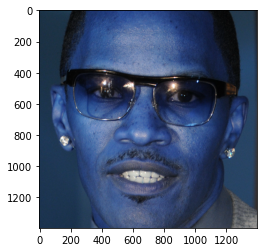

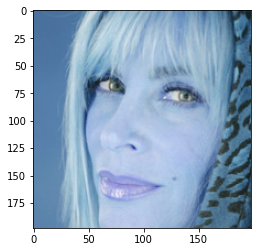

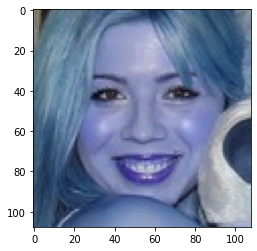

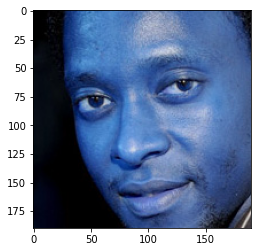

Mtcnn error


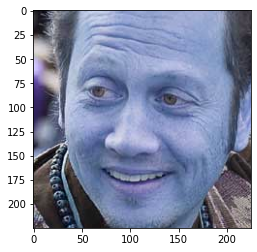

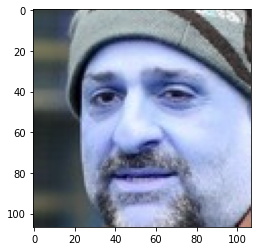

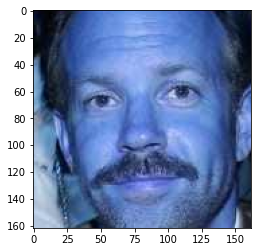

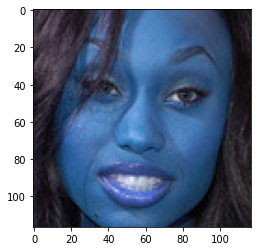

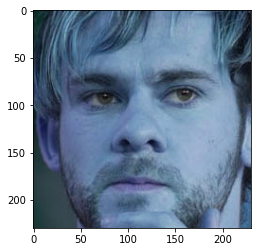

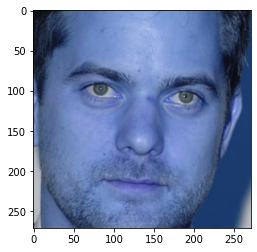

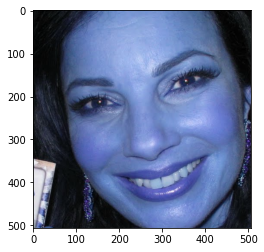

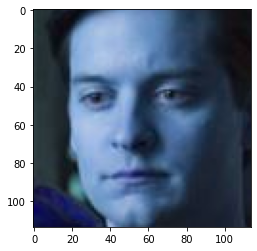

Mtcnn error


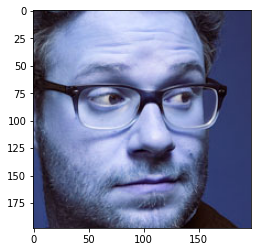

Mtcnn error


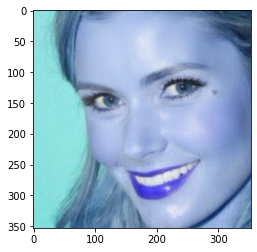

Mtcnn error
Mtcnn error


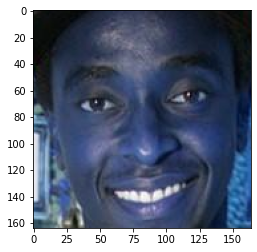

skip
Epoch 1/15
9/9 [==============================] - 179s 20s/step - loss: 17.2978 - accuracy: 0.0000e+00
Epoch 2/15
9/9 [==============================] - 178s 20s/step - loss: 17.2978 - accuracy: 0.0000e+00
Epoch 3/15
9/9 [==============================] - 178s 20s/step - loss: 17.2978 - accuracy: 0.0000e+00
Epoch 4/15
9/9 [==============================] - 177s 19s/step - loss: 17.2978 - accuracy: 0.0000e+00
Epoch 5/15
5/9 [===============>..............] - ETA: 1:25 - loss: 16.6684 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
bc=0
currentNoOfImage=0
detector = MTCNN()
while bc==0:
  noOfImages=0
  x=[]
  y=[]
  #Stage 1: Downloading a chunk of images
  nio=currentNoOfImage+45790
  #if nio>=len(X_train)-1:
  #  nio=len(X_train)-1
  #  bc==1
  for i in range(145791):
    #print("IN")





    #find a way to download image
    try:
      req = urllib.request.urlopen(X_train[i][0])
   
    #print("here")
      arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
      img = cv2.imdecode(arr, -1) # 'Load it as it is'
          #variable to store image
    except:
      continue





    ####Find The face
    x1,y1,x2,y2=map(int,X_train[i][1].split(','))
    try:
      
    
    
   
      #      create the detector, using default weights
    
    # detect faces in the image
      faces = detector.detect_faces(img)
      plt.imshow(img[y1:y2, x1:x2])
      plt.show()
      if(len(faces)==0):
       print("skip")
       continue
      
    except:

      print("Mtcnn error")
      continue
    
    

    #Append the data
    currentNoOfImage+=1
    print("Current No Of images =",currentNoOfImage)
    x.append(cv2.resize(img[y1:y2, x1:x2], (240, 240)))
    y.append(y_train[i])
    if(currentNoOfImage % 5 ==0 ):

      f = open('x.pckl', 'wb')
      pickle.dump(x, f)
      f.close()

      f = open('y.pckl', 'wb')
      pickle.dump(y, f)
      f.close()



  #Step 2: Training that cunk of data again
  y=np.array(y)
  x=np.array(x)



  #model.fit(x=x,y=y,epochs=15,batch_size=10)



  #prepare next bit of data
  currentNoOfImage=nio








In [ ]:
x1,y1,x2,y2


('991', '380', '1157', '546')

In [ ]:
md=vgg()
md.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:

req = urllib.request.urlopen(X_train[6][0])
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
plt.imshow(img)

ValueError: ignored

In [ ]:
len(Image)


145790